<a href="https://colab.research.google.com/github/SWLee1212/KAIST-ML-Advanced-courses/blob/master/3_2_Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

target  cluster
0       0          50
1       1           5
        2          45
2       1          50
Name: sepal length (cm), dtype: int64


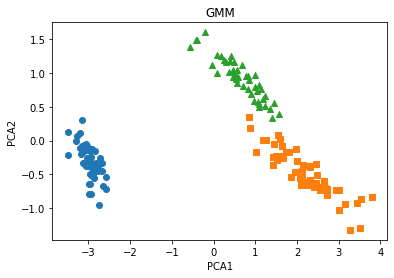

In [7]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

# 데이터를 불러오고, 데이터 프레임 형태로 만든 후 반환하는 함수입니다.
def load_data():
    
    iris = load_iris()
    
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    irisDF['target'] = iris.target
    
    return irisDF
    
"""
1. GMM 클러스터링을 
   수행하는 함수를 구현합니다.
   
   Step01. GMM 객체를 불러옵니다.
           
           군집의 개수는 3,
           일관된 결과 확인을 위해 
           random_state를 100으로 설정합니다.
           
   Step02. GMM 클러스터링을 수행합니다.
           
           클러스터링은 정답이 없는 데이터를
           사용하기 때문에 target 변수를 제거한
           데이터를 학습시켜줍니다.
           
   Step03. 군집화 결과를 
           iris 데이터 프레임에 추가합니다.
           
"""
def gmm_clus(irisDF):
    
    gmm = GaussianMixture(n_components = 3, random_state=100)
    
    gmm.fit(irisDF.iloc[:,0:-1])
    
    irisDF['cluster'] = gmm.predict(irisDF.iloc[:,0:-1])
    
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    return iris_result, irisDF

# 군집화 결과 시각화하기
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('GMM')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("plot.png")
    # elice_utils.send_image("plot.png")


def main():
    
    irisDF = load_data()
    
    iris_result, irisDF = gmm_clus(irisDF)
    
    Visualize(irisDF)
    
    
if __name__ == "__main__":
    main()


In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
    iris = load_iris()
    
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    irisDF['target'] = iris.target

In [6]:
irisDF.iloc[:,0:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
